In [299]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [300]:
class Compartment:
    def __init__(self, MTTF, Duty_Cycle,MTTR): # αρχικοποίηση της κλάσης
        self.MTTF = MTTF
        self.Duty_Cycle = Duty_Cycle
        self.MTTR = MTTR
        self.is_working=1
    
    def refresh(self):
        if ( np.random.randint(self.MTTR)==0):
            if (self.is_working==1):
                self.is_working=0
                
def match_colors(comp_working):
    colors=[]
    for i in range(0,1500):
        if (comp_working[i]>0):
            colors.append('black')
        else:
            colors.append('red')  
    return colors

In [301]:
C1=Compartment(37,0.7,10)
C2=Compartment(20,1,10)
C3=Compartment(20,1,10)
C4=Compartment(20,1,10)
C5=Compartment(37,0.7,10)

In [302]:
time=np.arange(0,150,0.1)
SystTime=np.arange(0,30,0.1)
C1Reliability=np.exp(-time*(1/C1.MTTF))
p1=C1Reliability
C2Reliability=np.exp(-time*(1/C2.MTTF))
p2=C2Reliability

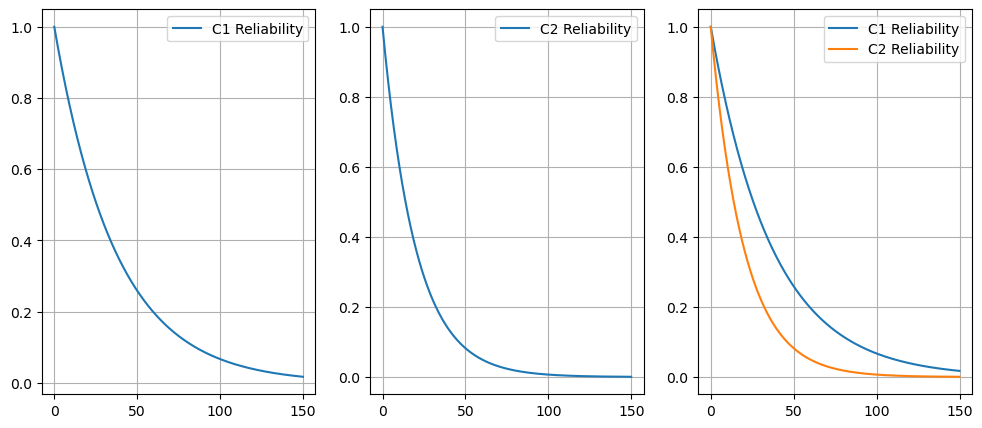

In [303]:
fig , ax = plt.subplots(1,3,figsize=(12,5) )
ax[0].plot(time,p1,label='C1 Reliability')
ax[0].grid()
ax[0].legend()


ax[1].plot(time,p2,label='C2 Reliability')
ax[1].grid()
ax[1].legend()


ax[2].plot(time,p1,label='C1 Reliability')
ax[2].plot(time,p2,label='C2 Reliability')
ax[2].grid()
ax[2].legend()

plt.show()

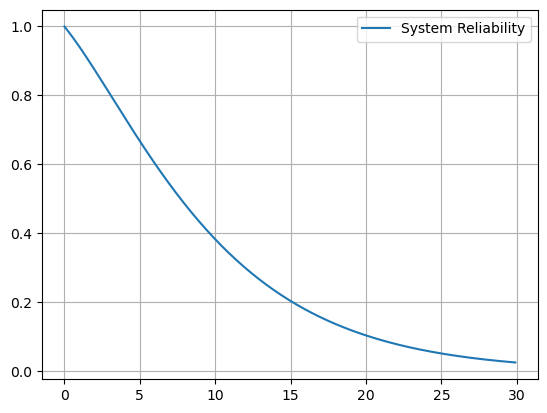

In [304]:
plt.plot(time[:300],(p1*(3*p2**2-2*p2**3)*p1)[:300],label='System Reliability')
plt.grid()
plt.legend()
plt.show()

In [312]:
index1=np.zeros(1000)
for j in range(0,1000):
    C1=Compartment(37,0.7,10)
    for i in range(1,time.shape[0]):
        if (   round( (i*0.1/C1.Duty_Cycle) % 1 , 2) ==0 ):
            C1.refresh()
        if (C1.is_working==0):
            index1[j]=i/10
            break
            
print('For compartment C1: Mean=',index1.mean(),'hours. Max=',index1.max(),'hours. Min=',index1.min(),'hours.')

index2=np.zeros(1000)
for j in range(0,1000):
    C2=Compartment(20,1,10)
    for i in range(1,time.shape[0]):
        if (   round( (i*0.1/C2.Duty_Cycle) % 1 , 2) ==0 ):
            C2.refresh()
        if (C2.is_working==0):
            index2[j]=i/10
            break
            
print('For compartment C2: Mean=',index2.mean(),'hours. Max=',index2.max(),'hours. Min=',index2.min(),'hours.')

For compartment C1: Mean= 7.081899999999999 hours. Max= 60.2 hours. Min= 0.7 hours.
For compartment C2: Mean= 9.341 hours. Max= 58.0 hours. Min= 1.0 hours.


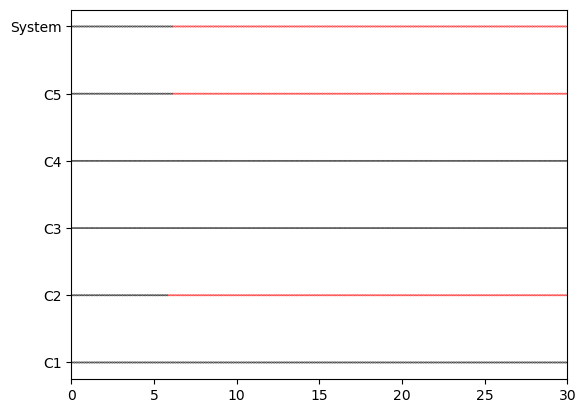

In [291]:
C1=Compartment(37,0.7,10)
C2=Compartment(20,1,10)
C3=Compartment(20,1,10)
C4=Compartment(20,1,10)
C5=Compartment(37,0.7,10)
working=np.ones(1500)*0.9
C1_working=np.ones(1500)*0.15
C2_working=np.ones(1500)*0.3
C3_working=np.ones(1500)*0.45
C4_working=np.ones(1500)*0.6
C5_working=np.ones(1500)*0.75


for i in range(4,time.shape[0]):
    if (   round( (i*0.1/C1.Duty_Cycle) % 1 , 2) ==0 ):
        C1.refresh()
        C5.refresh()
        if (C1.is_working==0):
            C1_working[i-1:]=0

        if (C5.is_working==0):
            C5_working[i-1:]=0
            
    if (   round( (i*0.1/C2.Duty_Cycle) % 1 , 2) ==0 ):
        C2.refresh()
        C3.refresh()
        C4.refresh()
        if (C2.is_working==0):
            C2_working[i-1:]=0

        if (C3.is_working==0):
            C3_working[i-1:]=0

        if (C4.is_working==0):
            C4_working[i-1:]=0
            
    if ( (C1.is_working and C5.is_working and (C2.is_working+C3.is_working+C4.is_working>1) ) != 1 ):
        working[i-1:]=0
        break

C1_colors=match_colors(C1_working)
C2_colors=match_colors(C2_working)
C3_colors=match_colors(C3_working)
C4_colors=match_colors(C4_working)
C5_colors=match_colors(C5_working)
system_colors=match_colors(working)

plt.scatter(time,np.ones(1500)*0.15,color=C1_colors,s=0.1)
plt.scatter(time,np.ones(1500)*0.3,color=C2_colors,s=0.1)
plt.scatter(time,np.ones(1500)*0.45,color=C3_colors,s=0.1)
plt.scatter(time,np.ones(1500)*0.6,color=C4_colors,s=0.1)
plt.scatter(time,np.ones(1500)*0.75,color=C5_colors,s=0.1)
plt.scatter(time,np.ones(1500)*0.9,color=system_colors,s=0.1)

plt.yticks(ticks=[0.15,0.3,0.45,0.6,0.75,0.9],labels=['C1','C2','C3','C4','C5','System'])
plt.xlim(0,30)
plt.show()

In [266]:
index=np.ones(1000)
for j in range(0,1000):
    C1=Compartment(37,0.7,10)
    C2=Compartment(20,1,10)
    C3=Compartment(20,1,10)
    C4=Compartment(20,1,10)
    C5=Compartment(37,0.7,10)
    for i in range(2,time.shape[0]):
        if ( round( (i*0.1/C1.Duty_Cycle) % 1 , 2) ==0 ):
            C1.refresh()
            C5.refresh()
        if ( round( (i*0.1/C2.Duty_Cycle) % 1 , 2) ==0 ):
            C2.refresh()
            C3.refresh()
            C4.refresh()
        if ( (C1.is_working and C5.is_working and (C2.is_working+C3.is_working+C4.is_working>1) ) != 1 ):
            index[j]=i
            break